## FrozenLake-v1

Here is a [better rendering](https://nbviewer.org/github/facebookresearch/Pearl/blob/main/tutorials/frozen_lake/frozen_lake.ipynb) of this notebook on [nbviewer](https://nbviewer.org/).

This example shows how to use DQN to solve the `FrozenLake-v1` environment from gymnasium. This environment has observations as indices (tabular observation)which is not suitable for learning with a neural network. In what follows, we show how to use Pearl's `OneHotObservationsFromDiscrete` wrapper to convert observations to their one-hot representations.

In [1]:
%load_ext autoreload
%autoreload 2

I0212 225446.596 magics.py:84] %autoreload was called with parameter_s='2'


## Installation
If you haven't installed Pearl, please make sure you install Pearl with the following cell. Otherwise, you can skip the cell below.

In [2]:
%pip uninstall Pearl -y
%rm -rf Pearl
!git clone https://github.com/facebookresearch/Pearl.git
%cd Pearl
%pip install .
%cd ..

/mnt/xarfuse/uid-304016/165a7884-seed-nspid4026531836_cgpid23203732-ns-4026531841/runtime/bin/bento_kernel_pearl_binary#native-main#bundle-runtime#cinder#py_version_3_10_cinder: No module named pip
Note: you may need to restart the kernel to use updated packages.
Cloning into 'Pearl'...
fatal: unable to access 'https://github.com/facebookresearch/Pearl.git/': Couldn't connect to server
[Errno 2] No such file or directory: 'Pearl'
/data/users/rodrigobraz
/mnt/xarfuse/uid-304016/165a7884-seed-nspid4026531836_cgpid23203732-ns-4026531841/runtime/bin/bento_kernel_pearl_binary#native-main#bundle-runtime#cinder#py_version_3_10_cinder: No module named pip
Note: you may need to restart the kernel to use updated packages.
/data/users


## Import Modules

In [3]:
from pearl.utils.functional_utils.experimentation.set_seed import set_seed
from pearl.policy_learners.sequential_decision_making.deep_q_learning import DeepQLearning
from pearl.replay_buffers.sequential_decision_making.sarsa_replay_buffer import SARSAReplayBuffer
from pearl.utils.functional_utils.train_and_eval.online_learning import online_learning
from pearl.pearl_agent import PearlAgent
from pearl.utils.instantiations.environments.gym_environment import GymEnvironment
from pearl.utils.instantiations.environments.environments import (
    OneHotObservationsFromDiscrete,
)
from pearl.utils.instantiations.spaces.discrete import DiscreteSpace
import torch
import matplotlib.pyplot as plt
import numpy as np
from pearl.action_representation_modules.one_hot_action_representation_module import (
    OneHotActionTensorRepresentationModule,
)

set_seed(0)

I0212 225508.977 box.py:24] Using 'gymnasium' package.
I0212 225508.980 box_action.py:25] Using 'gymnasium' package.
I0212 225508.982 discrete.py:22] Using 'gymnasium' package.
I0212 225508.984 discrete_action.py:25] Using 'gymnasium' package.
I0212 225509.422 gym_environment.py:27] Using 'gymnasium' package.


## Vanilla DQN 

[W 240212 22:55:14 passive_env_checker:233] `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)


episode 1, step 100, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 4, step 289, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 5, step 389, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 6, step 489, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 8, step 591, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 9, step 691, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 10, step 791, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 11, step 891, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 12, step 991, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 13, step 1077, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 14, step 1149, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 15, step 1234, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 16, step 1334, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 17, step 1434, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 18, step 1515, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 20, step 1689, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 21, step 1732, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 24, step 1804, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 26, step 1901, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 27, step 2001, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 28, step 2101, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 32, step 2268, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 33, step 2332, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 35, step 2405, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 40, step 2590, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0
episode 41, step 2605, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 43, step 2723, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 44, step 2822, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 45, step 2922, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 47, step 3033, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 48, step 3133, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 49, step 3207, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 52, step 3377, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 53, step 3477, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 55, step 3554, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 57, step 3660, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 58, step 3707, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 61, step 3898, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 62, step 3998, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 63, step 4098, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 64, step 4131, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 66, step 4249, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 68, step 4378, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 69, step 4434, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 71, step 4579, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 72, step 4655, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 73, step 4754, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 74, step 4833, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 75, step 4908, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 76, step 5008, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 79, step 5156, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 80, step 5209, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 84, step 5343, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 86, step 5448, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 88, step 5527, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 90, step 5695, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 91, step 5795, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 92, step 5895, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 93, step 5995, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 94, step 6095, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 95, step 6126, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 96, step 6226, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 98, step 6333, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 105, step 6418, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 108, step 6525, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 110, step 6665, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 111, step 6765, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 112, step 6865, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 114, step 6978, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 115, step 7037, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 116, step 7128, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 118, step 7221, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 119, step 7321, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 121, step 7451, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 123, step 7561, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 125, step 7630, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 126, step 7706, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 129, step 7811, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 130, step 7911, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 131, step 8011, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 133, step 8144, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 134, step 8244, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 136, step 8352, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 138, step 8451, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 139, step 8526, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 142, step 8616, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 146, step 8723, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 148, step 8844, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 149, step 8925, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 150, step 9025, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 152, step 9128, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 159, step 9200, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 165, step 9327, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 166, step 9427, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 169, step 9594, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0
episode 170, step 9600, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 172, step 9729, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 174, step 9814, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 178, step 9904, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 179, step 10004, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 189, step 10118, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 193, step 10205, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 202, step 10330, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 212, step 10405, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 220, step 10507, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 229, step 10622, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 241, step 10701, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 255, step 10801, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 269, step 10901, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 286, step 11010, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 301, step 11101, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 314, step 11202, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 329, step 11302, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 345, step 11400, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 362, step 11504, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 379, step 11603, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 395, step 11703, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 411, step 11804, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 427, step 11904, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 444, step 12005, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 460, step 12101, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 479, step 12203, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 495, step 12304, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 511, step 12405, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 528, step 12502, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 544, step 12600, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 562, step 12705, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 579, step 12805, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 595, step 12903, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 611, step 13000, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 629, step 13104, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 645, step 13204, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 661, step 13305, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 677, step 13405, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 691, step 13503, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 708, step 13606, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 723, step 13704, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 739, step 13805, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 755, step 13904, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 772, step 14004, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 788, step 14104, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 804, step 14203, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 821, step 14305, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 837, step 14405, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 854, step 14505, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 871, step 14605, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 887, step 14705, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 904, step 14803, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 920, step 14901, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 937, step 15004, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 952, step 15105, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 968, step 15203, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 983, step 15301, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 999, step 15405, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1016, step 15504, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1032, step 15605, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1048, step 15700, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1064, step 15803, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1080, step 15902, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1096, step 16004, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1111, step 16100, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1128, step 16200, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1144, step 16300, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1161, step 16402, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1178, step 16501, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 1195, step 16602, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1211, step 16700, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1228, step 16804, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1244, step 16900, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1261, step 17005, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1276, step 17105, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1293, step 17202, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 1309, step 17301, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1325, step 17400, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1342, step 17503, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1358, step 17600, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1374, step 17703, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1391, step 17805, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1407, step 17904, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1421, step 18002, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1436, step 18103, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1451, step 18202, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1466, step 18300, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1483, step 18404, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1499, step 18505, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1513, step 18600, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1529, step 18701, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1545, step 18800, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1561, step 18905, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1577, step 19003, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1595, step 19100, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0


episode 1612, step 19201, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1629, step 19305, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1646, step 19407, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1662, step 19502, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1678, step 19600, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1695, step 19709, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1710, step 19801, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1727, step 19905, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


episode 1742, step 20001, agent=PearlAgent with DeepQLearning, FIFOOffPolicyReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 1.0


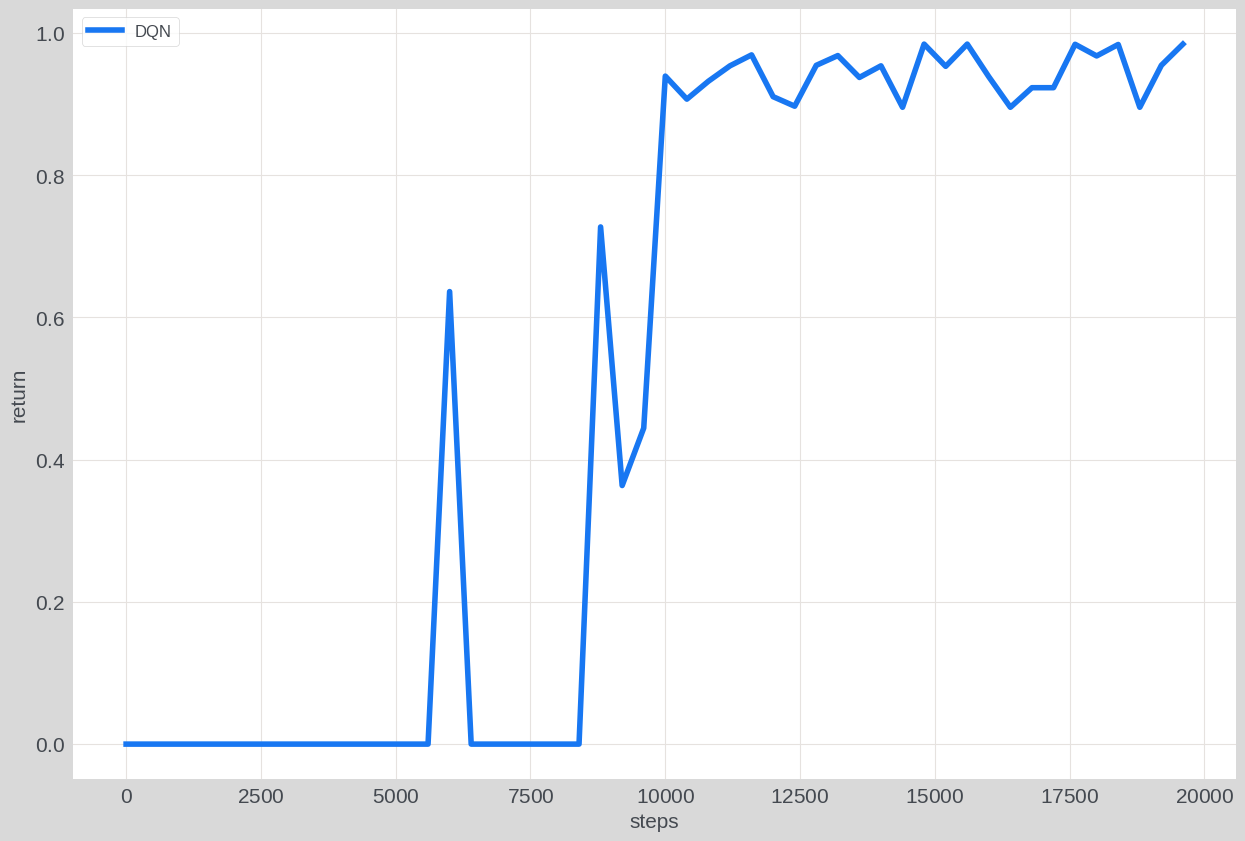

In [4]:
number_of_steps = 20000
record_period = 400

"""
This test is checking if DQN will eventually solve FrozenLake-v1
whose observations need to be wrapped in a one-hot representation.
"""
env = OneHotObservationsFromDiscrete(
    GymEnvironment(
        "FrozenLake-v1", is_slippery=False, map_name="4x4",
    )
)

action_representation_module = OneHotActionTensorRepresentationModule(
    max_number_actions= env.action_space.n,
)

assert isinstance(env.action_space, DiscreteSpace)
state_dim = env.observation_space.n
agent = PearlAgent(
    policy_learner=DeepQLearning(
        state_dim=state_dim,
        action_space=env.action_space,
        hidden_dims=[64, 64],
        training_rounds=1,
        action_representation_module=action_representation_module
    ),
    replay_buffer=SARSAReplayBuffer(1000),
)

info = online_learning(
    agent=agent,
    env=env,
    number_of_steps=number_of_steps,
    print_every_x_steps=100,
    record_period=record_period,
    learn_after_episode=False,
)
torch.save(info["return"], "DQN-return.pt")
plt.plot(record_period * np.arange(len(info["return"])), info["return"], label="DQN")
plt.xlabel("steps")
plt.ylabel("return")
plt.legend()
plt.show()